<a href="https://colab.research.google.com/github/CristianS1988/GooSL/blob/main/PruebaF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

In [2]:
my_data = pd.read_csv("df_arabica_clean.csv", delimiter=",")
my_data[0:5]

,Unnamed: 0,ID,Country of Origin,Farm Name,Lot Number,Mill,ICO Number,Company,Altitude,Region,...,Total Cup Points,Moisture Percentage,Category One Defects,Quakers,Color,Category Two Defects,Expiration,Certification Body,Certification Address,Certification Contact
0,0,0,Colombia,Finca El Paraiso,CQU2022015,Finca El Paraiso,NaN,Coffee Quality Union,1700-1930,"Piendamo,Cauca",...,89.33,11.8,0,0,green,3,"September 21st, 2023",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901
1,1,1,Taiwan,Royal Bean Geisha Estate,"The 2022 Pacific Rim Coffee Summit,T037",Royal Bean Geisha Estate,NaN,Taiwan Coffee Laboratory,1200,Chiayi,...,87.58,10.5,0,0,blue-green,0,"November 15th, 2023",Taiwan Coffee Laboratory 台灣咖啡研究室,"QAHWAH CO., LTD 4F, No. 225, Sec. 3, Beixin Rd...","Lin, Jen-An Neil 林仁安 - 886-289116612"
2,2,2,Laos,OKLAO coffee farms,"The 2022 Pacific Rim Coffee Summit,LA01",oklao coffee processing plant,NaN,Taiwan Coffee Laboratory,1300,Laos Borofen Plateau,...,87.42,10.4,0,0,yellowish,2,"November 15th, 2023",Taiwan Coffee Laboratory 台灣咖啡研究室,"QAHWAH CO., LTD 4F, No. 225, Sec. 3, Beixin Rd...","Lin, Jen-An Neil 林仁安 - 886-289116612"
3,3,3,Costa Rica,La Cumbre,CQU2022017,La Montana Tarrazu MIll,NaN,Coffee Quality Union,1900,"Los Santos,Tarrazu",...,87.17,11.8,0,0,green,0,"September 21st, 2023",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901
4,4,4,Colombia,Finca Santuario,CQU2023002,Finca Santuario,NaN,Coffee Quality Union,1850-2100,"Popayan,Cauca",...,87.08,11.6,0,2,yellow-green,2,"March 5th, 2024",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901


In [3]:
data_size = my_data.shape

print(f"El conjunto de datos tiene {data_size[0]} registros y {data_size[1]} características.")

El conjunto de datos tiene 207 registros y 41 características.


In [4]:
# Seleccionar las variables relevantes
X = my_data[['Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body']].values

# Mostrar los primeros 5 registros de las variables seleccionadas
print(X[0:5])

[[8.58 8.5  8.42 8.58 8.25]
 [8.5  8.5  7.92 8.   7.92]
 [8.33 8.42 8.08 8.17 7.92]
 [8.08 8.17 8.17 8.25 8.17]
 [8.33 8.33 8.08 8.25 7.92]]


In [6]:
from sklearn import preprocessing

# Cargar el dataset
df = pd.read_csv("df_arabica_clean.csv")

# Extraer las columnas necesarias para X
X = df[['Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body']].values

# Codificar las variables categóricas
le_country = preprocessing.LabelEncoder()
le_country.fit(df['Country of Origin'])
X[:, 0] = le_country.transform(df['Country of Origin'])

# Codificar más variables categóricas si es necesario

print(X[0:5])

[[ 1.    8.5   8.42  8.58  8.25]
 [16.    8.5   7.92  8.    7.92]
 [ 9.    8.42  8.08  8.17  7.92]
 [ 2.    8.17  8.17  8.25  8.17]
 [ 1.    8.33  8.08  8.25  7.92]]


In [7]:
y = df["Country of Origin"]
print(y[0:5])


0      Colombia
1        Taiwan
2          Laos
3    Costa Rica
4      Colombia
Name: Country of Origin, dtype: object


In [8]:
from sklearn.model_selection import train_test_split


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [15]:
from sklearn.model_selection import train_test_split

# Divide los datos en conjuntos de entrenamiento y prueba
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.2, random_state=42)

# Crea una instancia del modelo de árbol de decisiones
coffeeTree = DecisionTreeClassifier(criterion='entropy', max_depth=4)

# Ajusta el modelo a los datos de entrenamiento
coffeeTree.fit(X_trainset, y_trainset)


DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [16]:
coffeeTree.fit(X_trainset, y_trainset)


DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [17]:
# Realiza predicciones en el conjunto de prueba
predTree = coffeeTree.predict(X_testset)


In [18]:
print(predTree[0:5])
print(y_testset[0:5])


['Honduras' 'Taiwan' 'Taiwan' 'Thailand' 'Costa Rica']
161       Honduras
15          Taiwan
73          Taiwan
96        Thailand
166    El Salvador
Name: Country of Origin, dtype: object


In [20]:
from sklearn import metrics

accuracy = metrics.accuracy_score(y_testset, predTree)
print("Precisión:", accuracy)


Precisión: 0.8571428571428571


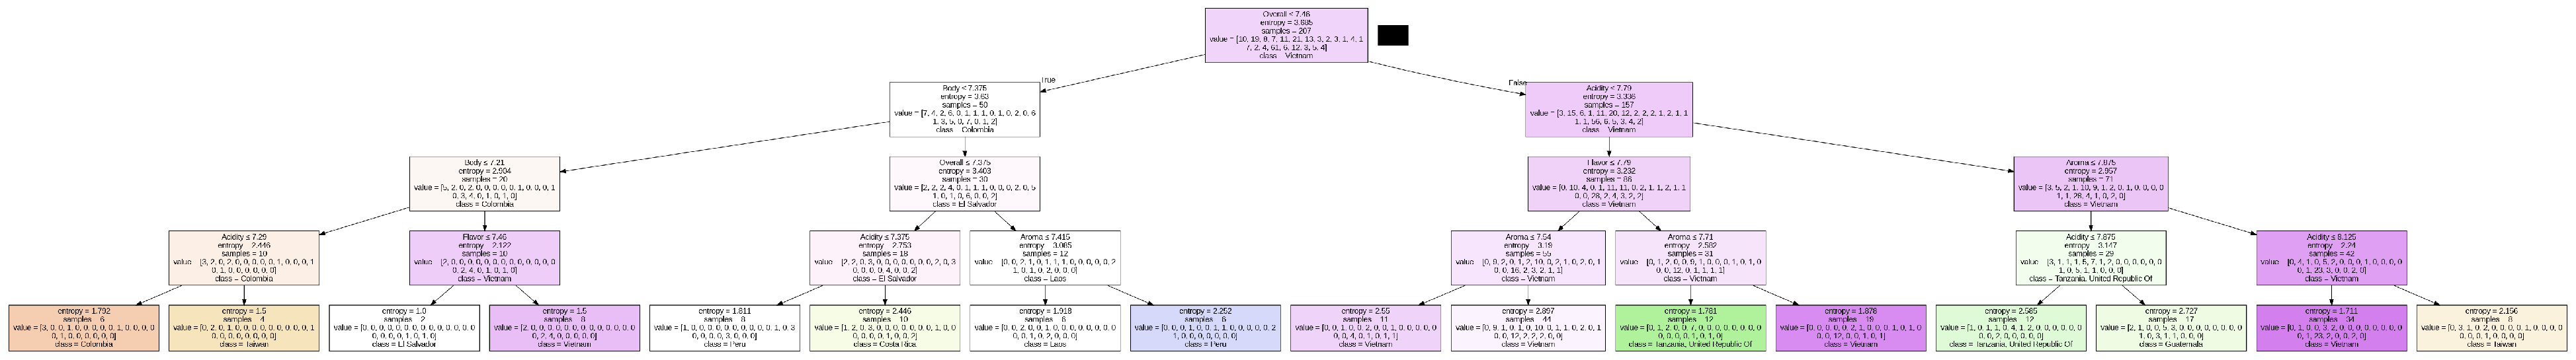

In [25]:
from io import StringIO
import pandas as pd
import numpy as np
import pydotplus
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn import tree

# Adaptar las variables X y y según tu conjunto de datos
X = df[['Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance', 'Uniformity', 'Clean Cup', 'Sweetness', 'Overall']]
y = df['Country of Origin']

# Crear una instancia del DecisionTreeClassifier
coffeeTree = DecisionTreeClassifier(criterion='entropy', max_depth=4)

# Entrenar el modelo
coffeeTree.fit(X, y)

# Generar el código fuente Graphviz
dot_data = StringIO()
featureNames = X.columns.tolist()
targetNames = y.unique().tolist()
out = tree.export_graphviz(coffeeTree, feature_names=featureNames, out_file=dot_data, class_names=targetNames, filled=True, special_characters=True, rotate=False)

# Generar el gráfico del árbol de decisiones
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
filename = "coffee_tree.png"
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(50, 100))
plt.imshow(img, interpolation='nearest')
plt.axis('off')
plt.show()


In [33]:
print("Predicciones:")
print(predTree)
print("\nEtiquetas reales:")
print(y_testset)

Predicciones:
['Honduras' 'Taiwan' 'Taiwan' 'Thailand' 'Costa Rica'
 'Tanzania, United Republic Of' 'Ethiopia' 'Taiwan' 'Taiwan' 'Costa Rica'
 'Honduras' 'Taiwan' 'Nicaragua' 'Costa Rica' 'Costa Rica' 'Nicaragua'
 'Vietnam' 'Taiwan' 'Taiwan' 'United States (Hawaii)' 'Colombia'
 'Indonesia' 'Indonesia' 'Colombia' 'Taiwan' 'Brazil' 'Guatemala'
 'Ethiopia' 'Indonesia' 'Brazil' 'Taiwan' 'Costa Rica' 'Taiwan'
 'United States (Hawaii)' 'Nicaragua' 'Guatemala' 'Honduras' 'Taiwan'
 'Taiwan' 'Honduras' 'Taiwan' 'Guatemala']

Etiquetas reales:
161                        Honduras
15                           Taiwan
73                           Taiwan
96                         Thailand
166                     El Salvador
9      Tanzania, United Republic Of
100                        Ethiopia
135                          Taiwan
18                           Taiwan
148                      Costa Rica
171                        Honduras
30                           Taiwan
155                       Ni